# Fundamentals of Data Analysis: Task Assessment 3

Julian Dunne (g00267940@gmit.ie)

<b>Task assessment:</b> Write some python code that simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track of the number of heads in each of the 1,000 simulations. Select an appropriate plot to depict the resulting list of 1,000 numbers, showing that it roughly follows a bell-shaped curve.
***

Step 1) Import the numpy libraries to be used throughout this task assessment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

Step 2) Simulate flipping a coin where heads=1 and tails=0.
Each tests consists of 100 coin toss.
The test is run 1000 times.

In [2]:
coin_toss = np.random.default_rng().binomial(100, 0.5, 1000)

Step 3) Create a dictionary that returns the numbers of times in the number of tests in which heads is recorded.

In [3]:
count = {}

for i in coin_toss:

    count[i] = count.get(i, 0) + 1
    count = dict(sorted(count.items()))
    
print(count)

{36: 1, 37: 3, 38: 3, 39: 5, 40: 9, 41: 12, 42: 22, 43: 32, 44: 24, 45: 64, 46: 66, 47: 59, 48: 72, 49: 86, 50: 81, 51: 76, 52: 73, 53: 57, 54: 70, 55: 47, 56: 39, 57: 29, 58: 17, 59: 20, 60: 19, 61: 6, 62: 1, 63: 3, 64: 2, 65: 1, 66: 1}


Step 4) Determine the number of bins required to accurately display the data.

In [4]:
# Create a list with key values from count dictionary
keys = list(count.keys())

# Subtract the max from the min key value and add 1 as this value is part of the dataset
bin_value = (max(keys) - min(keys))+1

Step 5) Generate a histrogram showing the numbers of times in the number of tests in which heads was recorded.

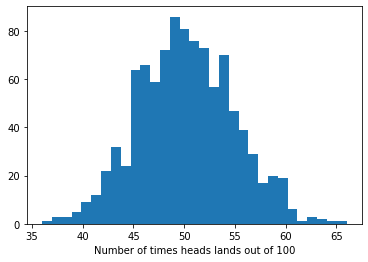

In [5]:
plt.hist(coin_toss, bins=bin_value)
plt.xlabel("Number of times heads lands out of 100")
plt.show()